In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.Container {width:85% !important;}
div.CodeMirror {font-family:맑은고딕; font-size:14pt; line-height : 150%;}
div.output_area pre {font-family:맑은고딕; font-size:14pt; line-height : 150%;}
div.output_wrapper pre {font-family:맑은고딕; font-size:14pt; line-height : 150%;}
div.input {font-family:맑은고딕; font-size:14pt; line-height : 150%;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

# 한글 설정
plt.rc('font', family = 'Malgun Gothic')
# plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv(r"C:\Users\swkim\OneDrive\바탕 화면\2. 팀\6. 사이버범죄 연구\211202_cyberdata.csv", encoding = "CP949")

df.head()

,번호,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,...,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,-1.0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,...,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt...",NaN,NaN,NaN
1,0.0,평창 동계올림픽 전산망 해킹사고,2018,"IOC, 평창올림픽 당국, 후원 기업 올림픽 파트너",정부,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","공공행정, 국방 및 사회보장 행정",한국,러시아 군 정보기관,정부,...,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","보안뉴스, 2018년 5월 3일 입력, 2021년 9월 6일 접속, https://...",NaN,NaN,NaN
2,1.0,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,...,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/...",NaN,NaN,NaN
3,2.0,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003.01,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,...,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN,NaN,NaN,NaN
4,3.0,1·25 인터넷 대란,2003.01.25,KT,기업,"방송국, 언론사, 통신사",정보통신업,한국,미상,미상,...,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,웹사이트,대한민국의 정보 보안 사고 목록,"위키백과, https://ko.wikipedia.org/wiki/%EB%8C%80%...",https://namu.wiki/w/1.25%20%EC%9D%B8%ED%84%B0%...,NaN,NaN,NaN


In [4]:
df.describe()

,번호,Unnamed: 33,Unnamed: 34,Unnamed: 35
count,1027.000000,0.0,0.0,0.0
mean,512.545278,NaN,NaN,NaN
std,297.301497,NaN,NaN,NaN
min,-1.000000,NaN,NaN,NaN
25%,255.500000,NaN,NaN,NaN
50%,512.000000,NaN,NaN,NaN
75%,770.500000,NaN,NaN,NaN
max,1027.000000,NaN,NaN,NaN


In [5]:
df.columns

Index(['번호', '사건명', '발생년도\n(연,월,일)', '범죄 대상(단체)', 'Victim_Type',
       'Victim_Class', '산업분류', '피해 국가', '범죄주체', 'Criminal_Type', '범죄주체\n관련국가',
       'SLCAs/PLCAs', '내부/외부 범죄 여부', 'In_or_Out', '동기(목적)', 'Purpose',
       'Purpose2', '공격 유형(대분류)', '사용된 기술(중분류)', 'Attack_Skill',
       'Attack_Skill2', '준비기간\n(공격기간)', '해커수준\n(등급)', '자산피해규모', '결과종합',
       'Result', 'Result2', '국내적용 법률', '국제적용법률', '자료형태', '자료제목', '출처 및 링크',
       '비고', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [6]:
df.drop(columns = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'], inplace=True)

df.columns

Index(['번호', '사건명', '발생년도\n(연,월,일)', '범죄 대상(단체)', 'Victim_Type',
       'Victim_Class', '산업분류', '피해 국가', '범죄주체', 'Criminal_Type', '범죄주체\n관련국가',
       'SLCAs/PLCAs', '내부/외부 범죄 여부', 'In_or_Out', '동기(목적)', 'Purpose',
       'Purpose2', '공격 유형(대분류)', '사용된 기술(중분류)', 'Attack_Skill',
       'Attack_Skill2', '준비기간\n(공격기간)', '해커수준\n(등급)', '자산피해규모', '결과종합',
       'Result', 'Result2', '국내적용 법률', '국제적용법률', '자료형태', '자료제목', '출처 및 링크',
       '비고'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   번호             1027 non-null   float64
 1   사건명            1013 non-null   object 
 2   발생년도
(연,월,일)   948 non-null    object 
 3   범죄 대상(단체)      988 non-null    object 
 4   Victim_Type    1027 non-null   object 
 5   Victim_Class   1027 non-null   object 
 6   산업분류           1027 non-null   object 
 7   피해 국가          1027 non-null   object 
 8   범죄주체           1027 non-null   object 
 9   Criminal_Type  1027 non-null   object 
 10  범죄주체
관련국가      1027 non-null   object 
 11  SLCAs/PLCAs    1027 non-null   object 
 12  내부/외부 범죄 여부    874 non-null    object 
 13  In_or_Out      1027 non-null   object 
 14  동기(목적)         779 non-null    object 
 15  Purpose        1027 non-null   object 
 16  Purpose2       1027 non-null   object 
 17  공격 유형(대분류)     546 non-null    object 
 18  사용된 기술(중

In [8]:
df['Attack_Skill2'].value_counts()

해킹                   376
악성코드                 300
명예훼손, 스토킹, 음란물 유포     87
사기, 도박                78
권한 오남용, 계정 도용         66
APT                   38
DDoS                  27
시스템 침해, 부주의           23
개인정보 침해               18
저작권 침해                14
Name: Attack_Skill2, dtype: int64

In [9]:
new_df = (df.Attack_Skill2 == '악성코드')

df[new_df]

,번호,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
0,-1.0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,...,NaN,"군사정보, 기밀정보 유출, 신뢰하락",국가기밀유출,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt..."
2,1.0,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/..."
3,2.0,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003.01,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN
6,5.0,해양설비 플랫폼 스카다(SCADA) 시스템 감염,2004,해양설비 플랫폼,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미상,미상,미상,...,NaN,"시스템 마비, 금전 손실",금전 손실,금전 손실,NaN,NaN,기사,"블록버스터급 사이버 공격, 그 실체와 보안 대책은?","AhnLab, 2016년 1월 4일 입력, https://www.ahnlab.com...",NaN
16,15.0,캘리포니아주 TCCA운하 제어시스템 마비,2007.08.15,TCCA 운하,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미국,전직 직원,개인,...,"5,000만 달러 손실",시스템 마비,금전 손실,금전 손실,NaN,NaN,"보고서,기사","국내외 정보통신기반시설 침해사고 사례, Insider charged with hac...","국정원, 2021국가정보보호백서, pp.99~100","COMPUTERWORLD, 2007년 11월 29일 입력, 2021년 9월 8일 접..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,Dark Caracal: Hacking group targets Android sm...,2018,안드로이드,기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",정보통신업,미국,Dark Caracal,범죄조직,...,NaN,"개인 데이터에 접근할 수 있는 권리를 부여(사진, 녹음, 오디오 등)",개인정보 유출,개인정보 유출,NaN,NaN,기사,Dark Caracal: Hacking group targets Android sm...,"CSO, 2018년 1월 21일 입력, 2021년 11월 4일 접속, https:/...",NaN
999,1000.0,"Using the trojan or malware, a woman’s webcam ...",NaN,여성,개인,"개인, 시설, 특정 단체, POS 단말기, 특정인(정치인,군인,대학 등)",개인,미상,미상,미상,...,NaN,웹캠에 접속해 개인 동영상을 캡처해 불법 웹사이트에 게시,개인정보 유출,개인정보 유출,NaN,NaN,웹사이트,"Using the trojan or malware, a woman’s webcam ...","cyberralegalservices, https://www.cyberralegal...",NaN
1009,1010.0,Hacker group inserted malware in NoxPlayer And...,2021,NoxPlayers,기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",정보통신업,아시아 전역,미상,미상,...,NaN,NaN,개인정보 유출,개인정보 유출,NaN,NaN,기사,Hacker group inserted malware in NoxPlayer And...,"zdnet, 2021년 2월 1일 입력, 2021년 11월 15일 접속, https...",NaN
1011,1012.0,UN maritime agency says it was hacked,2020,유엔 국제해사기구(UN IMO),기업,"개인, 시설, 특정 단체, POS 단말기, 특정인(정치인,군인,대학 등)",국제 및 외국기관,해외,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,기사,UN maritime agency says it was hacked,"zdnet, 2020년 10월 6일 입력, 2021년 11월 15일 접속, http...",NaN


In [10]:
malWare_df = df[new_df]

In [11]:
malWare_df.drop(columns='번호', inplace=True)

In [12]:
malWare_df.head()

,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,북한,...,NaN,"군사정보, 기밀정보 유출, 신뢰하락",국가기밀유출,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt..."
2,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/..."
3,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003.01,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN
6,해양설비 플랫폼 스카다(SCADA) 시스템 감염,2004,해양설비 플랫폼,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미상,미상,미상,미상,...,NaN,"시스템 마비, 금전 손실",금전 손실,금전 손실,NaN,NaN,기사,"블록버스터급 사이버 공격, 그 실체와 보안 대책은?","AhnLab, 2016년 1월 4일 입력, https://www.ahnlab.com...",NaN
16,캘리포니아주 TCCA운하 제어시스템 마비,2007.08.15,TCCA 운하,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미국,전직 직원,개인,미국,...,"5,000만 달러 손실",시스템 마비,금전 손실,금전 손실,NaN,NaN,"보고서,기사","국내외 정보통신기반시설 침해사고 사례, Insider charged with hac...","국정원, 2021국가정보보호백서, pp.99~100","COMPUTERWORLD, 2007년 11월 29일 입력, 2021년 9월 8일 접..."


In [13]:
malWare_df.reset_index(drop=True, inplace=True)

In [14]:
malWare_df.head()

,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,북한,...,NaN,"군사정보, 기밀정보 유출, 신뢰하락",국가기밀유출,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt..."
1,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/..."
2,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003.01,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN
3,해양설비 플랫폼 스카다(SCADA) 시스템 감염,2004,해양설비 플랫폼,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미상,미상,미상,미상,...,NaN,"시스템 마비, 금전 손실",금전 손실,금전 손실,NaN,NaN,기사,"블록버스터급 사이버 공격, 그 실체와 보안 대책은?","AhnLab, 2016년 1월 4일 입력, https://www.ahnlab.com...",NaN
4,캘리포니아주 TCCA운하 제어시스템 마비,2007.08.15,TCCA 운하,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미국,전직 직원,개인,미국,...,"5,000만 달러 손실",시스템 마비,금전 손실,금전 손실,NaN,NaN,"보고서,기사","국내외 정보통신기반시설 침해사고 사례, Insider charged with hac...","국정원, 2021국가정보보호백서, pp.99~100","COMPUTERWORLD, 2007년 11월 29일 입력, 2021년 9월 8일 접..."


In [15]:
malWare_df.isna().sum()

사건명                3
발생년도\n(연,월,일)     13
범죄 대상(단체)          7
Victim_Type        0
Victim_Class       0
산업분류               0
피해 국가              0
범죄주체               0
Criminal_Type      0
범죄주체\n관련국가         0
SLCAs/PLCAs        0
내부/외부 범죄 여부       42
In_or_Out          0
동기(목적)            60
Purpose            0
Purpose2           0
공격 유형(대분류)       194
사용된 기술(중분류)       44
Attack_Skill       0
Attack_Skill2      0
준비기간\n(공격기간)     283
해커수준\n(등급)       297
자산피해규모           225
결과종합              27
Result             0
Result2            0
국내적용 법률          295
국제적용법률           299
자료형태               0
자료제목               0
출처 및 링크            0
비고               239
dtype: int64

In [16]:
malWare_df[malWare_df['사건명'].isnull()]

,사건명,"발생년도\n(연,월,일)",범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
86,NaN,2012,컴퓨터 게임,기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",정보통신업,한국,북한 정찰총국,정부,북한,...,NaN,NaN,사회혼란,사회불안,NaN,NaN,논문,북한의 사이버공격과 대응방안에 관한 연구 : 미국의 소니 해킹사건 대응조치와의 비교...,http://www.riss.kr/link?id=A102165779,NaN
124,NaN,2017,"기업체, 병원, 대학교 등",기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",기타,한국,라자루스,정부,북한,...,NaN,NaN,사회혼란,침입시도,NaN,NaN,논문,"북한의 금융기관 사이버테러 실태 대응 개선방안 연구 (한상암, 김윤영, 2020)",http://www.riss.kr/link?id=A106919299,NaN
134,NaN,2019,통일부 관련 기관 종사자,정부,"개인, 시설, 특정 단체, POS 단말기, 특정인(정치인,군인,대학 등)","협회 및 단체, 수리 및 기타 개인 서비스업",한국,금성121,정부,북한,...,NaN,NaN,사회혼란,침입시도,NaN,NaN,논문,"북한 사이버 테러의 특성 분석 및 시사점(성용은, 2020)",http://www.riss.kr/link?id=A107049909,NaN


In [17]:
malWare_df.rename(columns={'발생년도\n(연,월,일)' : 'Year'}, inplace=True)

In [18]:
malWare_df['Year'] = malWare_df['Year'].str.slice(start=0, stop=4)

malWare_df.head()

,사건명,Year,범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,북한,...,NaN,"군사정보, 기밀정보 유출, 신뢰하락",국가기밀유출,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt..."
1,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/..."
2,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN
3,해양설비 플랫폼 스카다(SCADA) 시스템 감염,2004,해양설비 플랫폼,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미상,미상,미상,미상,...,NaN,"시스템 마비, 금전 손실",금전 손실,금전 손실,NaN,NaN,기사,"블록버스터급 사이버 공격, 그 실체와 보안 대책은?","AhnLab, 2016년 1월 4일 입력, https://www.ahnlab.com...",NaN
4,캘리포니아주 TCCA운하 제어시스템 마비,2007,TCCA 운하,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미국,전직 직원,개인,미국,...,"5,000만 달러 손실",시스템 마비,금전 손실,금전 손실,NaN,NaN,"보고서,기사","국내외 정보통신기반시설 침해사고 사례, Insider charged with hac...","국정원, 2021국가정보보호백서, pp.99~100","COMPUTERWORLD, 2007년 11월 29일 입력, 2021년 9월 8일 접..."


In [19]:
malWare_df['산업분류'].value_counts()

제조업                         42
공공행정, 국방 및 사회보장 행정          41
정보통신업                       36
개인                          34
금융 및 보험업                    20
보건업 및 사회복지 서비스업             18
도매 및 소매업                    17
기업                          16
운수 및 창고업                    14
교육 서비스업                     13
전기, 가스, 증기 및 공기 조절 공급업      12
협회 및 단체, 수리 및 기타 개인 서비스업     9
전문과학 및 기술 서비스업               9
기타                           5
건설업                          5
국제 및 외국기관                    4
사업시설 관리, 사업 지원 및 임대 서비스업     3
예술, 스포츠 및 여가관련 서비스업          2
Name: 산업분류, dtype: int64

In [20]:
malWare_df_copy = malWare_df.copy()

malWare_df_copy.head()

,사건명,Year,범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
0,군 인터넷망과 인트라넷망 (국방망) 해킹사건,2016,군 내부망,정부,국방 및 군사 조직,"공공행정, 국방 및 사회보장 행정",한국,북한,정부,북한,...,NaN,"군사정보, 기밀정보 유출, 신뢰하락",국가기밀유출,국가기밀유출,NaN,NaN,"보고서,기사","""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태...","국회정보위원회, 2019년12월, pp.45","IT WORLD, 2016년 12월 7일 입력, 2021년 9월 6일 접속, htt..."
1,"미국 데이비스 베스 원전, 감시계통에 바이러스 감염",2003,미국 데이비스 베스 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,"해외 원전 사이버공격 피해 사례와 교훈, ""전세계 원전, 해킹위험 부인하지만 실제로...","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","연합뉴스, 2015년 10월 5일 입력, 2021년 9월 6일 접속, https:/..."
2,오하이오주 Davie-Besse 원자력발전소 시스템 마비,2003,원자력발전소 Davie-Besse,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",미국,미상,미상,미상,...,NaN,시스템 마비,사회혼란,"업무 중단(시스템 마비, 악성코드 감염)",NaN,NaN,보고서,국내외 정보통신기반시설 침해사고 사례,"국정원, 2021국가정보보호백서, pp.99~100",NaN
3,해양설비 플랫폼 스카다(SCADA) 시스템 감염,2004,해양설비 플랫폼,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미상,미상,미상,미상,...,NaN,"시스템 마비, 금전 손실",금전 손실,금전 손실,NaN,NaN,기사,"블록버스터급 사이버 공격, 그 실체와 보안 대책은?","AhnLab, 2016년 1월 4일 입력, https://www.ahnlab.com...",NaN
4,캘리포니아주 TCCA운하 제어시스템 마비,2007,TCCA 운하,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설",운수 및 창고업,미국,전직 직원,개인,미국,...,"5,000만 달러 손실",시스템 마비,금전 손실,금전 손실,NaN,NaN,"보고서,기사","국내외 정보통신기반시설 침해사고 사례, Insider charged with hac...","국정원, 2021국가정보보호백서, pp.99~100","COMPUTERWORLD, 2007년 11월 29일 입력, 2021년 9월 8일 접..."


In [21]:
malWare_df_copy[malWare_df_copy['사건명'].isnull()]

,사건명,Year,범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
86,NaN,2012,컴퓨터 게임,기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",정보통신업,한국,북한 정찰총국,정부,북한,...,NaN,NaN,사회혼란,사회불안,NaN,NaN,논문,북한의 사이버공격과 대응방안에 관한 연구 : 미국의 소니 해킹사건 대응조치와의 비교...,http://www.riss.kr/link?id=A102165779,NaN
124,NaN,2017,"기업체, 병원, 대학교 등",기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",기타,한국,라자루스,정부,북한,...,NaN,NaN,사회혼란,침입시도,NaN,NaN,논문,"북한의 금융기관 사이버테러 실태 대응 개선방안 연구 (한상암, 김윤영, 2020)",http://www.riss.kr/link?id=A106919299,NaN
134,NaN,2019,통일부 관련 기관 종사자,정부,"개인, 시설, 특정 단체, POS 단말기, 특정인(정치인,군인,대학 등)","협회 및 단체, 수리 및 기타 개인 서비스업",한국,금성121,정부,북한,...,NaN,NaN,사회혼란,침입시도,NaN,NaN,논문,"북한 사이버 테러의 특성 분석 및 시사점(성용은, 2020)",http://www.riss.kr/link?id=A107049909,NaN


In [22]:
malWare_df_copy.drop(index=[86, 124, 134], inplace=True)

In [23]:
malWare_df_copy[malWare_df_copy['사건명'].str.contains('유출')]

,사건명,Year,범죄 대상(단체),Victim_Type,Victim_Class,산업분류,피해 국가,범죄주체,Criminal_Type,범죄주체\n관련국가,...,자산피해규모,결과종합,Result,Result2,국내적용 법률,국제적용법률,자료형태,자료제목,출처 및 링크,비고
7,방산업체 A사 정보 유출,2011,방산업체 A사,기업,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)",제조업,한국,미상,미상,제3국,...,NaN,100여 건 산업기술 유출,산업기술 유출,산업기술 유출,NaN,NaN,보고서,"""사이버공격을 통한 첨단산업비밀 유출 실태 및 대응방안 보고서"", 사이버 공격 실태","국회정보위원회, 2019년12월, pp. 57~67",NaN
9,네이트 개인정보 유출 사건,2011,SK커뮤니케이션즈,기업,"방송국, 언론사, 통신사",정보통신업,한국,미상,미상,중국,...,NaN,3500만명 개인정보 유출,개인정보 유출,개인정보 유출,NaN,NaN,웹사이트,대한민국의 정보 보안 사고 목록,"위키백과, https://ko.wikipedia.org/wiki/%EB%8C%80%...",NaN
11,중동국가 데이터 유출,2012,국가 주요시설,정부,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","공공행정, 국방 및 사회보장 행정","이란, 수단, 시리아 등 주요 중동국가",미상,미상,미상,...,NaN,"정보유출, 데이터 손실",데이터 손실,"데이터 손실(파괴, 변조 등)",NaN,NaN,"보고서,웹사이트","국내외 정보통신기반시설 침해사고 사례, 플레임 (악성 소프트웨어)","국정원, 2021국가정보보호백서, pp.99~100","위키백과, 2021년 5월 20일 입력, 2021년 9월 8일 접속, https:/..."
12,EBS 개인정보 유출 사건,2012,EBS,기업,"방송국, 언론사, 통신사",정보통신업,한국,미상,미상,중국(추정),...,NaN,400만명 개인정보 유출,개인정보 유출,개인정보 유출,NaN,NaN,"웹사이트,기사","대한민국의 정보 보안 사고 목록, EBS, 홈페이지 해킹으로 400만 회원 개인정보 유출","위키백과, https://ko.wikipedia.org/wiki/%EB%8C%80%...","이데일리 기사, https://www.edaily.co.kr/news/read?ne..."
15,타깃(Target) 개인정보 유출,2013,유통업체 타깃,기업,"대중 이용 포탈, 온라인사이트(NAVER, Google, 카톡, WeChat, 11...",도매 및 소매업,미국,미상,미상,미상,...,"1억 7,000만 달러","고객 7천만명 개인정보 유출,신뢰하락, 2차 범죄 노출",금전 손실,금전 손실,NaN,NaN,기사,"미국 '타깃', 개인정보 유출 사건에 1000만달러 배상, [개인정보 유출 대란] ...","전자신문, 2015년3월20일 입력, 2021년8월26일 접속, https://m....","서울신문, 2014년 1월 23일 입력, 2021년 9월 7일 접속, https:/..."
16,"일본 몬쥬 원전, 해킹으로 인해 내부정보 유출",2014,일본 몬쥬 원전,정부,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",일본,미상,미상,미상,...,NaN,42000건의 정보 유출,국가기밀유출,국가기밀유출,NaN,NaN,"보고서, 기사","해외 원전 사이버공격 피해 사례와 교훈, [보안컬럼]국가기간망 해킹, 대책 마련 시급","KEMRI, 2015, p.5~6, https://home.kepco.co.kr/k...","전자신문, 2017년 2월 7일 입력, 2021년 9월 6일 접속, https://..."
20,'원전반대그룹'의 대외비 문서 유출,2014,한국수력원자력,기업,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","전기, 가스, 증기 및 공기 조절 공급업",한국,원전반대그룹,범죄조직,한국,...,NaN,"정보유출, 평판 훼손, 신뢰 하락",국가기밀유출,국가기밀유출,NaN,NaN,기사,"북한의 사이버전 능력을 보여주는 5대 해킹 사건, [단독]원전 도면 또 유출…“비공...","BBC News, 2017년10월12 입력, 2021년 8월26일 접속, https...","경향비즈, 2014년 12월21일 입력, 2021년 9월 6일 접속, http:/..."
21,일본연금기구 개인정보 유출,2015,일본연금기구,기업,"금융기관, 비트코인 거래소, 증권 거래소",금융 및 보험업,일본,미상,미상,미상,...,NaN,고객 125만 명 개인정보 유출,개인정보 유출,개인정보 유출,NaN,NaN,"보고서,웹사이트","디지털 경제 활성화를 위한 사이버보험 역할제고 방안,[Threat Analysis]...","임준, 이상우, 이소양, 보험연구원, 권호:18-21, 2018년 12월, pp.60","보안이슈, 2015년 7월 2일 입력, 2021년 9월 7일 접속, https://..."
39,Yamakei Co. 개인정보 유출,2017,Yamakei Co.(출판사),기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",정보통신업,일본,미상,미상,미상,...,NaN,22만명 개인정보 유출,개인정보 유출,개인정보 유출,NaN,NaN,보고서,디지털 경제 활성화를 위한 사이버보험 역할제고 방안,"임준, 이상우, 이소양, 보험연구원, 권호:18-21, 2018년 12월, pp.60",NaN
50,하나투어 개인정보 유출 사건,2017,하나투어,기업,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)","사업시설 관리, 사업 지원 및 임대 서비스업",한국,미상,미상,미상,...,NaN,100만명 개인정보 유출,개인정보 유출,개인정보 유출,NaN,NaN,"웹사이트,기사","대한민국의 정보 보안 사고 목록, 하나투어 해킹당해…이름·전화번호·집주소 100만여...","위키백과, https://ko.wikipedia.org/wiki/%EB%8C%80%...","조선일보, https://biz.chosun.com/site/data/html_di..."


In [24]:
malWare_df_copy['Result2'].value_counts()

금전 손실                     84
데이터 손실(파괴, 변조 등)          62
개인정보 유출                   39
업무 중단(시스템 마비, 악성코드 감염)    36
국가기밀유출                    22
신뢰하락                      21
침입시도                      17
산업기술 유출                   12
사회불안                       4
Name: Result2, dtype: int64

In [25]:
#################################################################################
#################################################################################
#################################################################################

In [26]:
df = df.loc[:,['발생년도\n(연,월,일)','Victim_Class', 'Purpose2', 'Attack_Skill2', 'Result2']]

df.head()

,"발생년도\n(연,월,일)",Victim_Class,Purpose2,Attack_Skill2,Result2
0,2016,국방 및 군사 조직,"군, 국가핵심시설에 관한 정보탈취",악성코드,국가기밀유출
1,2018,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","국가기능 마비, 국가안보 위협",APT,"업무 중단(시스템 마비, 악성코드 감염)"
2,2003,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
3,2003.01,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
4,2003.01.25,"방송국, 언론사, 통신사","국가기능 마비, 국가안보 위협",DDoS,"업무 중단(시스템 마비, 악성코드 감염)"


In [27]:
df.rename(columns={'발생년도\n(연,월,일)' : 'Year'}, inplace=True)

In [28]:
df['Year'] = df['Year'].str.slice(start=0, stop=4)

df.head()

,Year,Victim_Class,Purpose2,Attack_Skill2,Result2
0,2016,국방 및 군사 조직,"군, 국가핵심시설에 관한 정보탈취",악성코드,국가기밀유출
1,2018,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","국가기능 마비, 국가안보 위협",APT,"업무 중단(시스템 마비, 악성코드 감염)"
2,2003,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
3,2003,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
4,2003,"방송국, 언론사, 통신사","국가기능 마비, 국가안보 위협",DDoS,"업무 중단(시스템 마비, 악성코드 감염)"


In [29]:
#################################################################################
#################################################################################

In [30]:
null_df = df[(df.Year == '2016') | (df.Year == '2017')]

null_df

,Year,Victim_Class,Purpose2,Attack_Skill2,Result2
0,2016,국방 및 군사 조직,"군, 국가핵심시설에 관한 정보탈취",악성코드,국가기밀유출
134,2016,의료기관,금전적 이득,악성코드,금전 손실
135,2016,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)",개인정보획득,해킹,개인정보 유출
136,2016,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","군, 국가핵심시설에 관한 정보탈취",악성코드,개인정보 유출
137,2016,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","정치적 목적달성, 종교적 목적","명예훼손, 스토킹, 음란물 유포",사회불안
...,...,...,...,...,...
992,2016,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)",금전적 이득,악성코드,금전 손실
993,2016,의료기관,금전적 이득,악성코드,금전 손실
994,2016,"개인, 시설, 특정 단체, POS 단말기, 특정인(정치인,군인,대학 등)",금전적 이득,악성코드,"데이터 손실(파괴, 변조 등)"
1025,2016,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",금전적 이득,해킹,산업기술 유출


In [31]:
null_df.reset_index(drop=True, inplace=True)

In [32]:
null_df[null_df['Year'] == '2016']['Result2'].value_counts()

금전 손실                     32
개인정보 유출                   18
국가기밀유출                    15
데이터 손실(파괴, 변조 등)          11
정신적 피해                     9
산업기술 유출                    7
신뢰하락                       6
업무 중단(시스템 마비, 악성코드 감염)     5
사회불안                       4
침입시도                       4
Name: Result2, dtype: int64

In [33]:
null_df[null_df['Year'] == '2017']['Result2'].value_counts()

금전 손실                     33
데이터 손실(파괴, 변조 등)          28
개인정보 유출                   26
업무 중단(시스템 마비, 악성코드 감염)     8
정신적 피해                     7
국가기밀유출                     5
신뢰하락                       5
침입시도                       3
사회불안                       1
Name: Result2, dtype: int64

In [34]:
#################################################################################
#################################################################################

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           948 non-null    object
 1   Victim_Class   1027 non-null   object
 2   Purpose2       1027 non-null   object
 3   Attack_Skill2  1027 non-null   object
 4   Result2        1027 non-null   object
dtypes: object(5)
memory usage: 78.4+ KB


<AxesSubplot:>

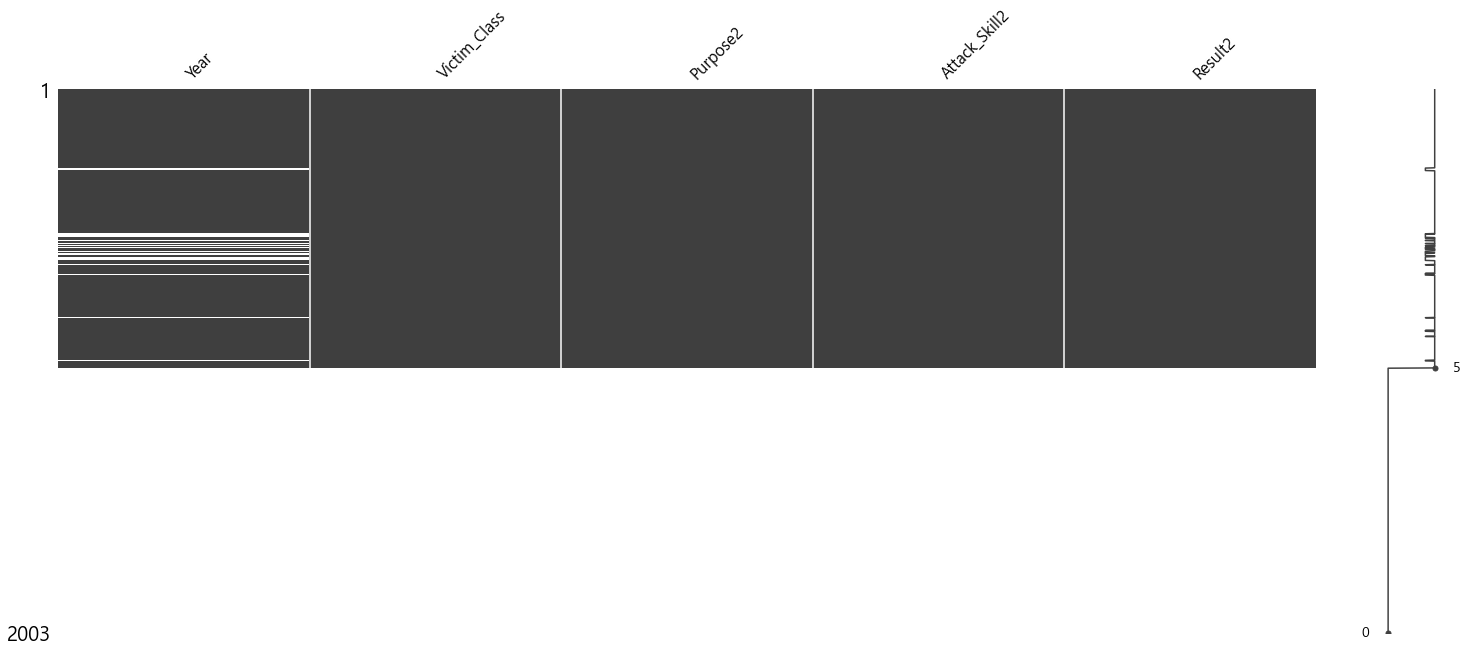

In [36]:
import missingno as msno

msno.matrix(df)

In [37]:
df.dropna(axis=0, inplace=True)

In [38]:
# Null 값 확인
# 데이터 깨끗함

df.isnull().sum() * 100 / df.shape[0]

Year             0.0
Victim_Class     0.0
Purpose2         0.0
Attack_Skill2    0.0
Result2          0.0
dtype: float64

<AxesSubplot:>

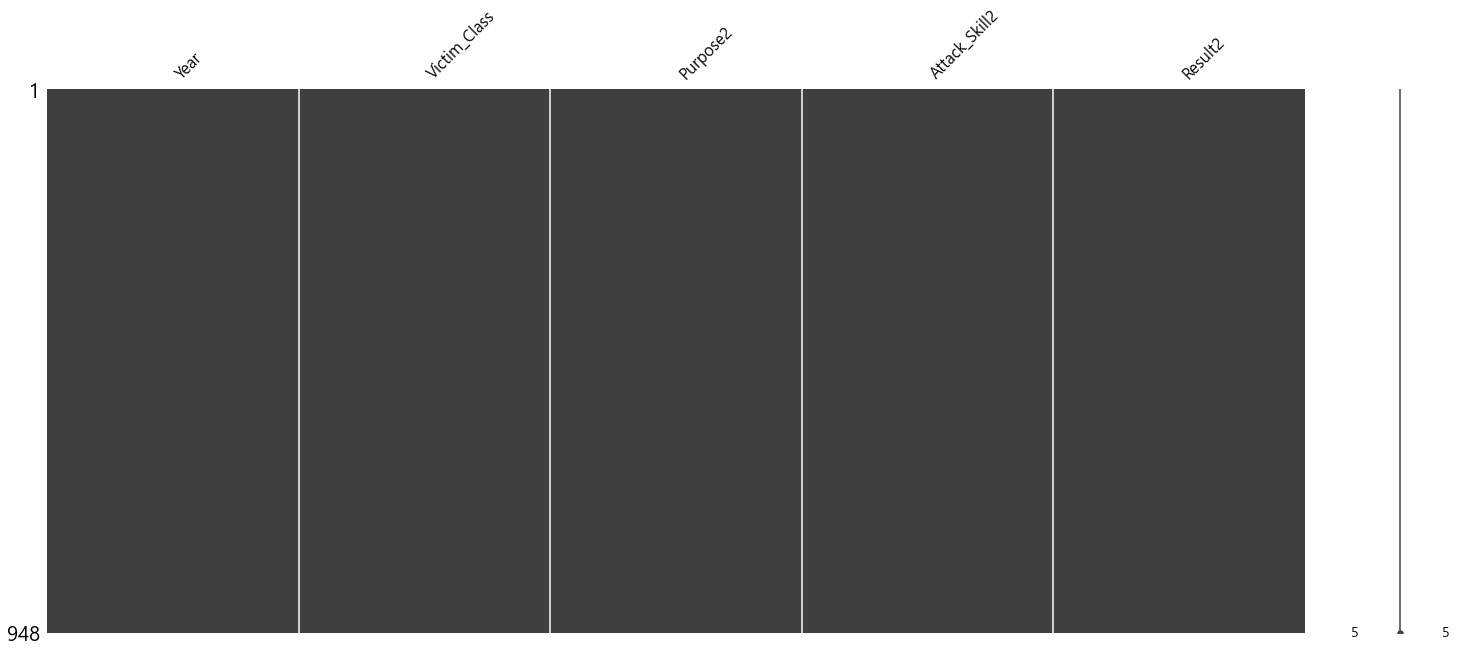

In [39]:
msno.matrix(df)

In [40]:
df.drop(df[df['Purpose2'] == '미상'].index, inplace=True)

In [41]:
# index 새로 생성
df.reset_index(drop=True, inplace=True)

df

,Year,Victim_Class,Purpose2,Attack_Skill2,Result2
0,2016,국방 및 군사 조직,"군, 국가핵심시설에 관한 정보탈취",악성코드,국가기밀유출
1,2018,"정부기관, 관공서 (전산망), 지재권(백신, 방위산업 등)","국가기능 마비, 국가안보 위협",APT,"업무 중단(시스템 마비, 악성코드 감염)"
2,2003,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
3,2003,"관공서 제어시스템(발전소, 오 폐수, 전력 SCADA 등), 국가기반시설","국가기능 마비, 국가안보 위협",악성코드,"업무 중단(시스템 마비, 악성코드 감염)"
4,2003,"방송국, 언론사, 통신사","국가기능 마비, 국가안보 위협",DDoS,"업무 중단(시스템 마비, 악성코드 감염)"
...,...,...,...,...,...
927,2020,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",금전적 이득,해킹,개인정보 유출
928,2019,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",금전적 이득,해킹,개인정보 유출
929,2019,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",금전적 이득,해킹,개인정보 유출
930,2016,"대기업(sony), 중소기업(자동차 공장, 첨단소재 등)",금전적 이득,해킹,산업기술 유출


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           932 non-null    object
 1   Victim_Class   932 non-null    object
 2   Purpose2       932 non-null    object
 3   Attack_Skill2  932 non-null    object
 4   Result2        932 non-null    object
dtypes: object(5)
memory usage: 36.5+ KB


In [139]:
df['Purpose2'].value_counts()

금전적 이득                555
군, 국가핵심시설에 관한 정보탈취    105
정치적 목적달성, 종교적 목적       65
국가기능 마비, 국가안보 위협       56
개인정보획득                 43
분노표출                   40
실력과시, 우월감, 영웅심         31
기술탈취                   14
경쟁에서 우위선점              13
사고                     10
Name: Purpose2, dtype: int64

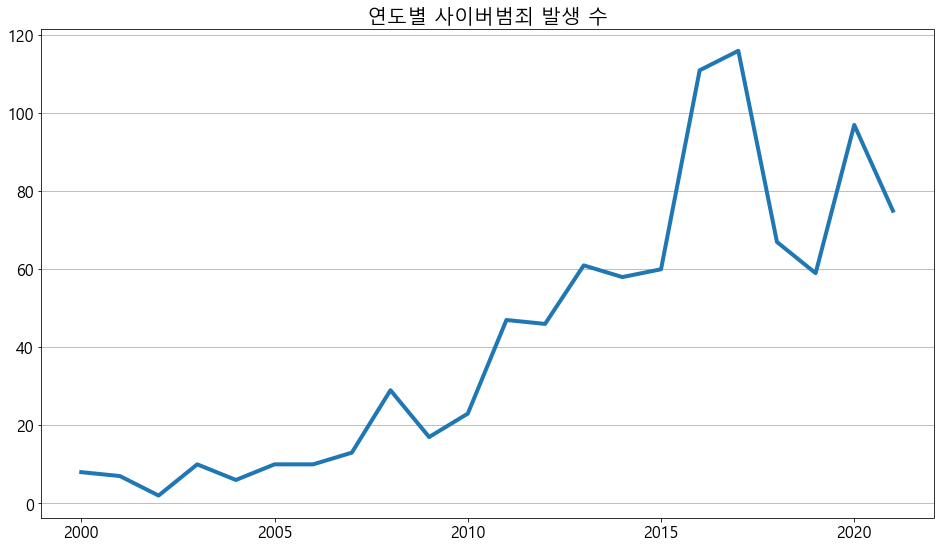

In [44]:
plt.figure(figsize=(16, 9))
df['Year'].value_counts().sort_index(ascending=True).plot(linewidth = "4")

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.title('연도별 사이버범죄 발생 수', fontsize = 20)

plt.grid(True, axis='y')
plt.show()

In [140]:
new_df = df.groupby(['Year','Purpose2']).size()

new_df

Year  Purpose2          
2000  국가기능 마비, 국가안보 위협      1
      군, 국가핵심시설에 관한 정보탈취    1
      금전적 이득                5
      정치적 목적달성, 종교적 목적      1
2001  국가기능 마비, 국가안보 위협      4
                           ..
2021  기술탈취                  1
      분노표출                  1
      사고                    2
      실력과시, 우월감, 영웅심        6
      정치적 목적달성, 종교적 목적      5
Length: 143, dtype: int64

In [141]:
new_df = pd.DataFrame(new_df)

new_df

0
Year Purpose2             
2000 국가기능 마비, 국가안보 위협    1
     군, 국가핵심시설에 관한 정보탈취  1
     금전적 이득              5
     정치적 목적달성, 종교적 목적    1
2001 국가기능 마비, 국가안보 위협    4
...                     ..
2021 기술탈취                1
     분노표출                1
     사고                  2
     실력과시, 우월감, 영웅심      6
     정치적 목적달성, 종교적 목적    5

[143 rows x 1 columns]

In [142]:
new_df.rename(columns={0:'공격방법'}, inplace=True)

new_df

공격방법
Year Purpose2                
2000 국가기능 마비, 국가안보 위협       1
     군, 국가핵심시설에 관한 정보탈취     1
     금전적 이득                 5
     정치적 목적달성, 종교적 목적       1
2001 국가기능 마비, 국가안보 위협       4
...                       ...
2021 기술탈취                   1
     분노표출                   1
     사고                     2
     실력과시, 우월감, 영웅심         6
     정치적 목적달성, 종교적 목적       5

[143 rows x 1 columns]

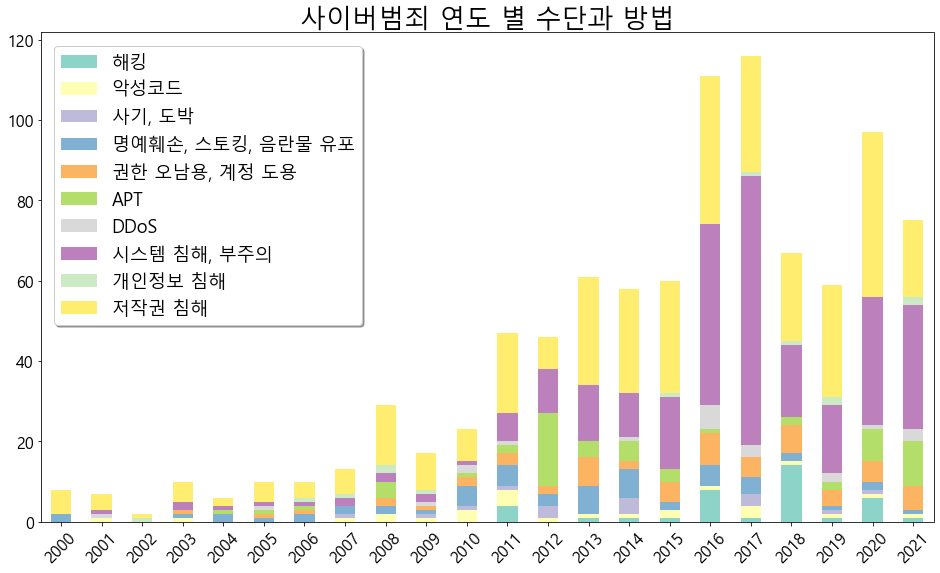

In [138]:
new_df.unstack().plot(kind='bar', stacked = True, figsize=(16, 9), cmap = 'Set3')

plt.xticks(rotation = 45, fontsize = 16)
plt.xlabel(None)

plt.yticks(fontsize = 16)
plt.ylabel(None)

plt.title("사이버범죄 연도 별 수단과 방법", fontsize = 26)

plt.legend(ncol=1, shadow = True, bbox_to_anchor=(0.37, 0.99), framealpha=1,
           labels = ['해킹',
                     '악성코드',
                     '사기, 도박',
                     '명예훼손, 스토킹, 음란물 유포',
                     '권한 오남용, 계정 도용',
                     'APT',
                     'DDoS',
                     '시스템 침해, 부주의',
                     '개인정보 침해',
                     '저작권 침해'],
          fontsize = 18)

plt.show()

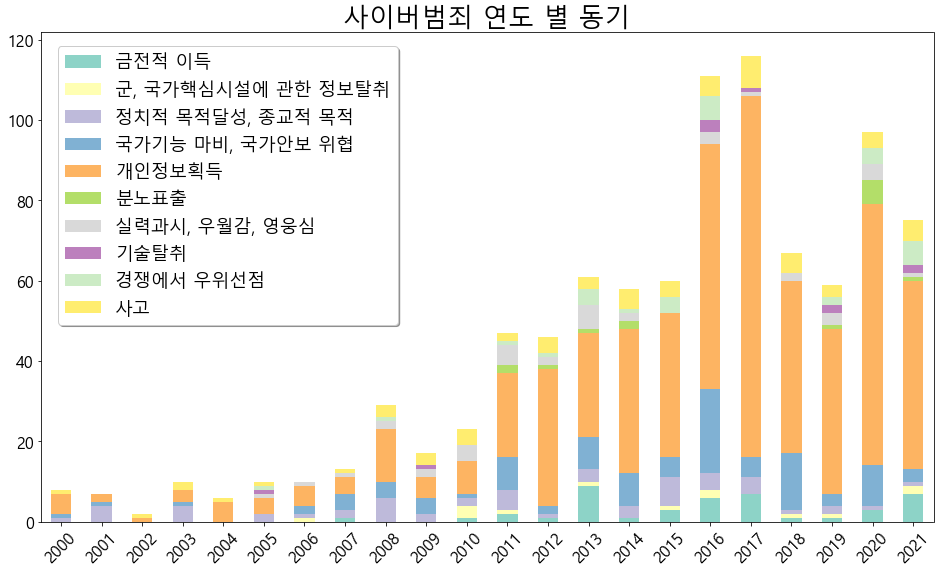

In [143]:
new_df.unstack().plot(kind='bar', stacked = True, figsize=(16, 9), cmap = 'Set3')

plt.xticks(rotation = 45, fontsize = 16)
plt.xlabel(None)

plt.yticks(fontsize = 16)
plt.ylabel(None)

plt.title("사이버범죄 연도 별 동기", fontsize = 26)

plt.legend(ncol=1, shadow = True, bbox_to_anchor=(0.41, 0.99), framealpha=1,
           labels = ['금전적 이득',
                     '군, 국가핵심시설에 관한 정보탈취',
                     '정치적 목적달성, 종교적 목적',
                     '국가기능 마비, 국가안보 위협',
                     '개인정보획득',
                     '분노표출',
                     '실력과시, 우월감, 영웅심',
                     '기술탈취',
                     '경쟁에서 우위선점',
                     '사고'],
          fontsize = 18)

plt.show()

In [124]:
current_path=os.getcwd()

current_path

'C:\\Users\\swkim\\OneDrive\\바탕 화면\\1. 개인\\0. 공부\\PYTHON'

In [49]:
df['Year'].value_counts().sort_index(ascending=True)

2000      8
2001      7
2002      2
2003     10
2004      6
2005     10
2006     10
2007     13
2008     29
2009     17
2010     23
2011     47
2012     46
2013     61
2014     58
2015     60
2016    111
2017    116
2018     67
2019     59
2020     97
2021     75
Name: Year, dtype: int64

# ADF TEST & ARIMA MODEL

In [50]:
# ADF Test
data = pd.read_csv(r'C:\Users\swkim\OneDrive\바탕 화면\2. 팀\6. 사이버범죄 연구\시계열2.csv', encoding='CP949')

data.head()

,연도,횟수
0,2000,8
1,2001,7
2,2002,2
3,2003,10
4,2004,7


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      22 non-null     int64
 1   횟수      22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [52]:
data['연도'] = data['연도'].astype(str)

In [53]:
data['연도'] = pd.to_datetime(data['연도'])

In [54]:
data.head()

,연도,횟수
0,2000-01-01,8
1,2001-01-01,7
2,2002-01-01,2
3,2003-01-01,10
4,2004-01-01,7


In [55]:
data.index = data['연도']
data.set_index("연도", inplace=True)

data.head()

,횟수
연도,
2000-01-01,8
2001-01-01,7
2002-01-01,2
2003-01-01,10
2004-01-01,7


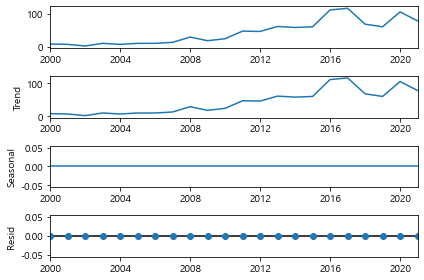

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(data, model='additive').plot()

plt.show()

In [57]:
## 정상성 검정2
# 귀무가설: 자료가 정상성을 만족하지 않는다. => 채택
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 7.108113
p-value: 1.000000
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


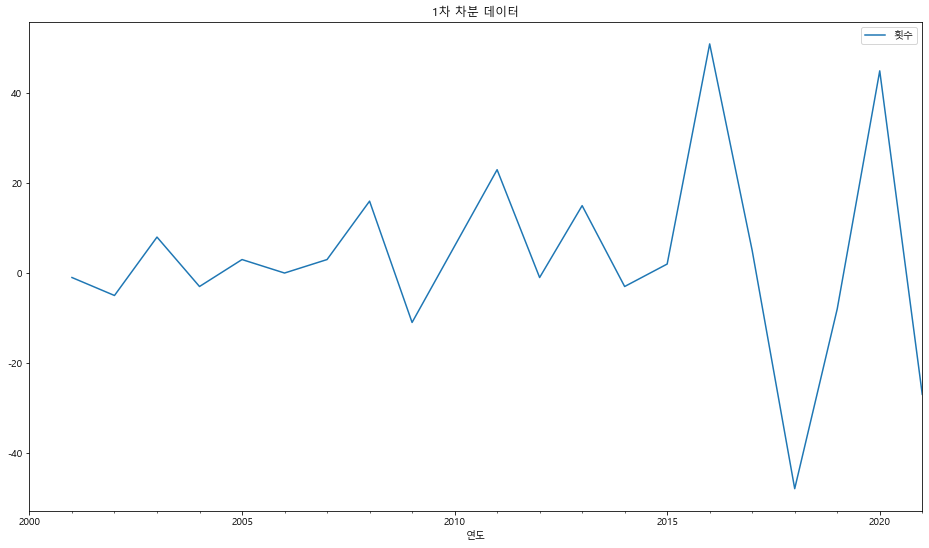

In [58]:
# 1차 차분
ts_diff = data - data.shift()

ts_diff.plot(figsize=(16, 9))
plt.title("1차 차분 데이터")

plt.show()

In [59]:
# 1차 차분 정상성 검정: 모수 중 d=1
# 귀무가설: 자료가 정상성을 만족. => 채택
result = adfuller(ts_diff[1:])
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.533089
p-value: 0.007177
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [60]:
## 정상성 검정: True (만족)
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(ts_diff[1:])

(0.4773690891109271, True)

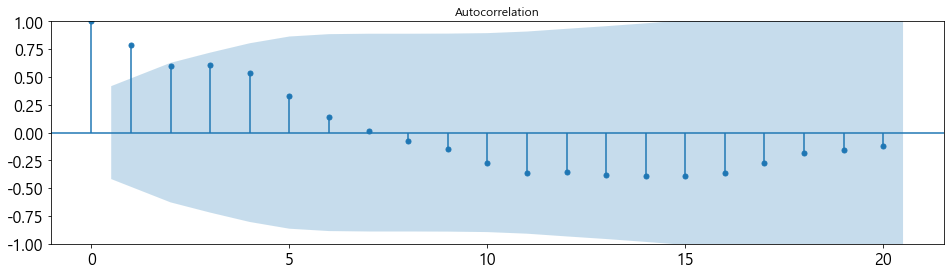

In [61]:
import statsmodels.api as sm

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=20, ax=ax1)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

In [62]:
from pmdarima.arima import auto_arima

model_arima = auto_arima(data,trace=True,
                         error_action='ignore',
                         start_p=1,start_q=1,
                         max_p=3,max_q=3,
                         suppress_warnings=True,
                         stepwise=False,
                         seasonal=False)

model_arima.fit(data)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=190.423, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=191.644, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=183.550, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=184.542, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=184.914, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 모수 결정
order = (2,1,0)

# 모델 생성
model = sm.tsa.statespace.SARIMAX(endog= data['횟수'], order = order, seasonal_order=None,
                                 enforce_invertibility= True,
                                 enforce_stationarity= True)

# 모델 학습
fit = model.fit()

display(fit.summary())

C:\Users\swkim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\swkim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     횟수   No. Observations:                   22
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -89.385
Date:                Thu, 20 Jan 2022   AIC                            184.770
Time:                        17:23:09   BIC                            187.903
Sample:                    01-01-2000   HQIC                           185.450
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1583      0.187     -0.845      0.398      -0.526       0.209
ar.L2         -0.6104      0.202     -3.020      0.003      -1.007      -0.214
sigma2       278.6952     64.469      4.323      0.000     152.339     405.052
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.94   Prob(JB):                         0.28
Heteroskedasticity (H):              24.51   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

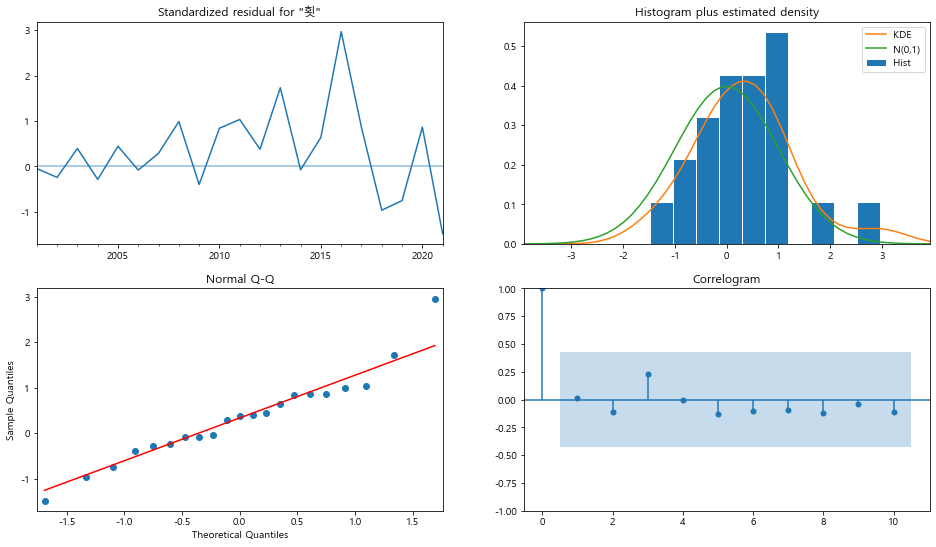

In [64]:
fit.plot_diagnostics(figsize=(16, 9))

plt.show()
# 정규성 만족 x -> 정규화 진행 후 모델 생성

In [65]:
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm

mod = sm.tsa.SARIMAX(data['횟수'], order = (2,1,0))
result = mod.fit()

display(result.summary())

C:\Users\swkim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\swkim\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     횟수   No. Observations:                   22
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -89.385
Date:                Thu, 20 Jan 2022   AIC                            184.770
Time:                        17:23:10   BIC                            187.903
Sample:                    01-01-2000   HQIC                           185.450
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1583      0.187     -0.845      0.398      -0.526       0.209
ar.L2         -0.6104      0.202     -3.020      0.003      -1.007      -0.214
sigma2       278.6952     64.469      4.323      0.000     152.339     405.052
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.94   Prob(JB):                         0.28
Heteroskedasticity (H):              24.51   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     횟수   No. Observations:                   22
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -89.385
Date:                Thu, 20 Jan 2022   AIC                            184.770
Time:                        17:23:10   BIC                            187.903
Sample:                    01-01-2000   HQIC                           185.450
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1583      0.187     -0.845      0.398      -0.526       0.209
ar.L2         -0.6104      0.202     -3.020      0.003      -1.007      -0.214
sigma2       278.6952     64.469      4.323      0.000     152.339     405.052
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.94   Prob(JB):                         0.28
Heteroskedasticity (H):              24.51   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

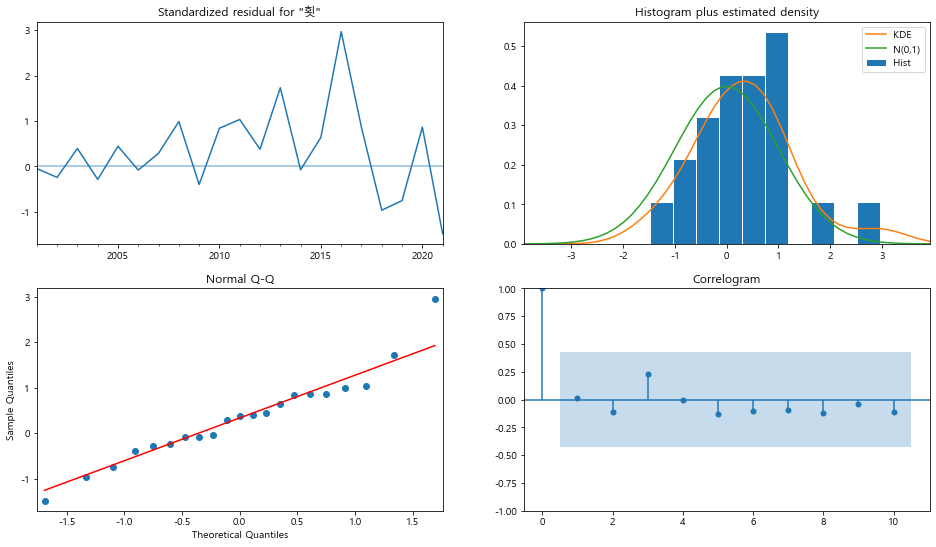

In [67]:
result.plot_diagnostics(figsize=(16, 9))

plt.show()

In [68]:
len(data['횟수'])

22

In [69]:
data['예측'] = result.predict(start = 0, end = 24)

In [70]:
data['예측']

연도
2000-01-01      0.000000
2001-01-01      7.999647
2002-01-01      7.096186
2003-01-01      3.402120
2004-01-01     11.785190
2005-01-01      2.591908
2006-01-01     11.356136
2007-01-01      8.168826
2008-01-01     12.524963
2009-01-01     24.635294
2010-01-01      9.975545
2011-01-01     29.764228
2012-01-01     39.695701
2013-01-01     32.119349
2014-01-01     59.235205
2015-01-01     49.319170
2016-01-01     61.514482
2017-01-01    101.703584
2018-01-01     84.078322
2019-01-01     72.548641
2020-01-01     90.565542
2021-01-01    102.757570
Name: 예측, dtype: float64

In [71]:
# 모델 예측
pred2 = pd.DataFrame(fit.predict(n_periods=20), index=data.index)
pred2.columns = ['predicted_count']

pred2

,predicted_count
연도,
2000-01-01,0.000000
2001-01-01,7.999647
2002-01-01,7.096186
2003-01-01,3.402120
2004-01-01,11.785190
2005-01-01,2.591908
2006-01-01,11.356136
2007-01-01,8.168826
2008-01-01,12.524963


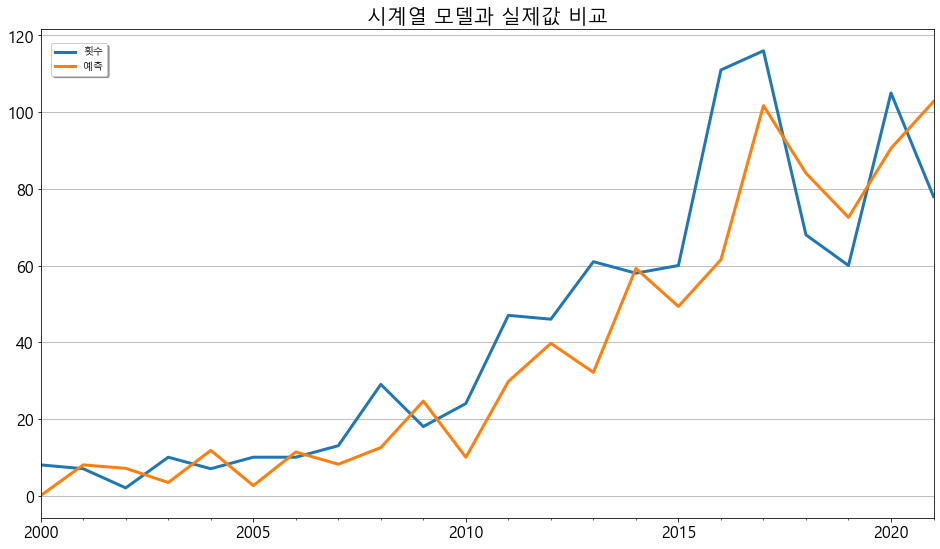

In [72]:
data[['횟수', '예측']].plot(figsize = (16, 9), linewidth=3)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.legend(shadow = True, bbox_to_anchor=(0.08, 0.98), framealpha=1)

plt.title('시계열 모델과 실제값 비교', fontsize = 20)
plt.xlabel(None)

plt.grid(True, axis='y')
plt.show()

In [73]:
pred = result.get_prediction(start = pd.to_datetime('2015-01-01'))
pred_ci = pred.conf_int()

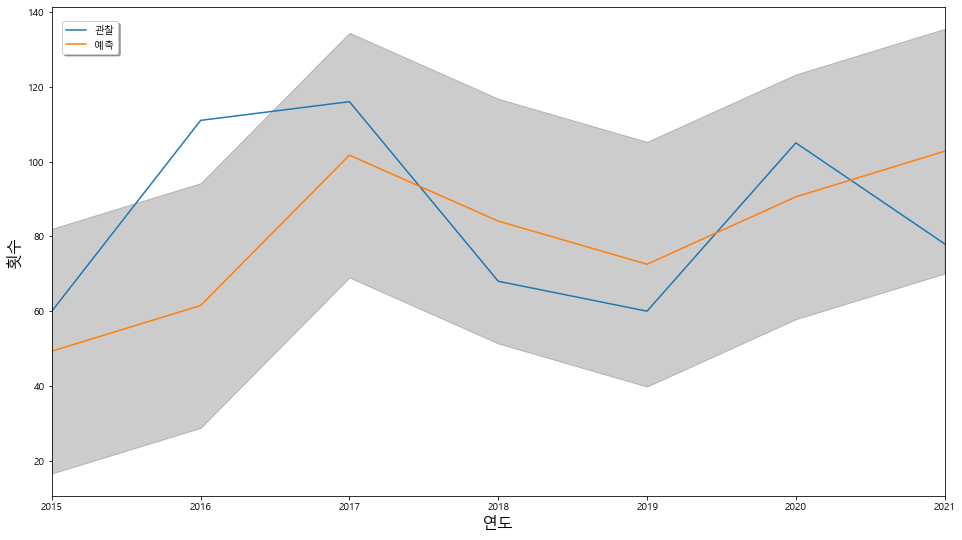

In [74]:
ax = data['횟수']['2015-01-01' : ].plot(label = '관찰', figsize = (16, 9))

# 예측
pred.predicted_mean.plot(
    ax = ax,
    label = '예측',
    alpha = 1
)

ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color = 'k',
    alpha = .2
)

ax.set_xlabel('연도', fontsize = 16)
ax.set_ylabel('횟수', fontsize = 16)

plt.legend(shadow = True, bbox_to_anchor=(0.08, 0.98), framealpha=1)
plt.show()

In [75]:
test_forecasted = pred.predicted_mean
test_truth = data['횟수']['2015-01-01':]

# Mean Square Error 계산
mse = (( test_forecasted - test_truth ) ** 2).mean()
print('우리의 Mean Square 오류는 {}'.format( round(mse, 2) ))

우리의 Mean Square 오류는 572.08


In [76]:
pred_dynamic = result.get_prediction(
    start = pd.to_datetime('2015-01-01'),
    dynamic = True,
    full_result = True
)

pred_dynamic_ci = pred_dynamic.conf_int()

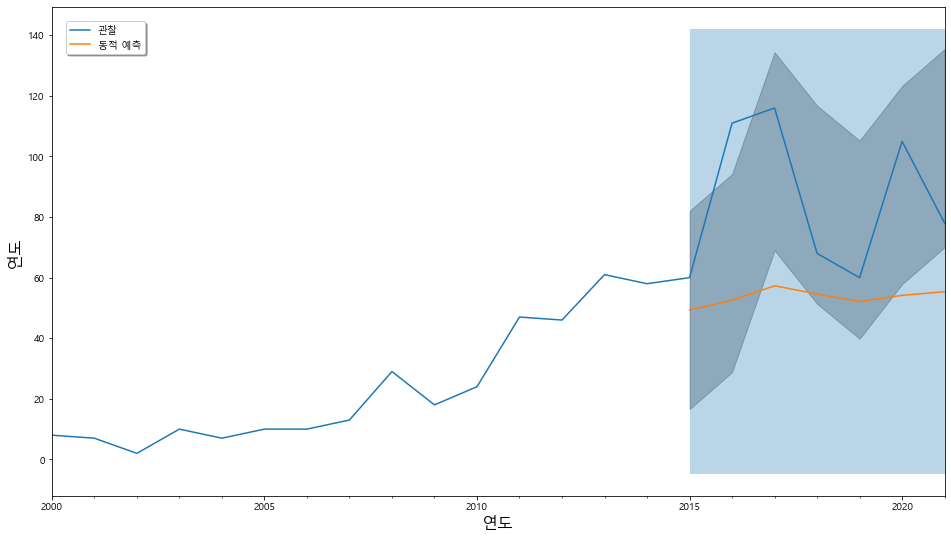

In [77]:
ax = data['횟수']['2000-01-01': ].plot(label = '관찰', figsize=(16, 9))

# 예측
pred_dynamic.predicted_mean.plot(
    ax = ax,
    label = '동적 예측'
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower 횟수'],
    pred_ci['upper 횟수'],
    color = 'k',
    alpha = .25
)

ax.fill_betweenx(
    ax.get_ylim(),
    pd.to_datetime('2015-01-01'),
    data.index[-1],
    alpha = .3,
)

ax.set_xlabel('연도', fontsize = 16)
ax.set_ylabel('연도', fontsize = 16)

plt.legend(shadow = True, bbox_to_anchor=(0.06, 0.98), framealpha=1, loc=9)
plt.show()

# 예측

In [78]:
test_forecasted = pred_dynamic.predicted_mean
test_truth = data['횟수']['2015-01-01':]

mse = (( test_forecasted - test_truth ) ** 2).mean()
print('Mean Square 오류 예측은 {}'.format( round(mse, 2)))

Mean Square 오류 예측은 1473.81


In [79]:
pred_uc = result.get_forecast( steps = 4 )
pred_ci = pred_uc.conf_int()

In [80]:
pred_ci.head()

,lower 횟수,upper 횟수
2022-01-01,22.087767,87.527698
2023-01-01,32.194034,117.727349
2024-01-01,42.344560,129.507262
2025-01-01,25.932147,117.844707


In [81]:
pred_ci['예측'] = (pred_ci['lower 횟수'] + pred_ci['upper 횟수']) / 2

pred_ci

,lower 횟수,upper 횟수,예측
2022-01-01,22.087767,87.527698,54.807733
2023-01-01,32.194034,117.727349,74.960692
2024-01-01,42.344560,129.507262,85.925911
2025-01-01,25.932147,117.844707,71.888427


In [82]:
data2 = data.copy()

data2.head()

,횟수,예측
연도,,
2000-01-01,8,0.000000
2001-01-01,7,7.999647
2002-01-01,2,7.096186
2003-01-01,10,3.402120
2004-01-01,7,11.785190


In [83]:
concat_df = pd.DataFrame(pred_ci['예측'].loc[:])

concat_df

,예측
2022-01-01,54.807733
2023-01-01,74.960692
2024-01-01,85.925911
2025-01-01,71.888427


In [84]:
data2 = pd.concat([data2, concat_df])

data2

,횟수,예측
2000-01-01,8.0,0.000000
2001-01-01,7.0,7.999647
2002-01-01,2.0,7.096186
2003-01-01,10.0,3.402120
2004-01-01,7.0,11.785190
2005-01-01,10.0,2.591908
2006-01-01,10.0,11.356136
2007-01-01,13.0,8.168826
2008-01-01,29.0,12.524963
2009-01-01,18.0,24.635294


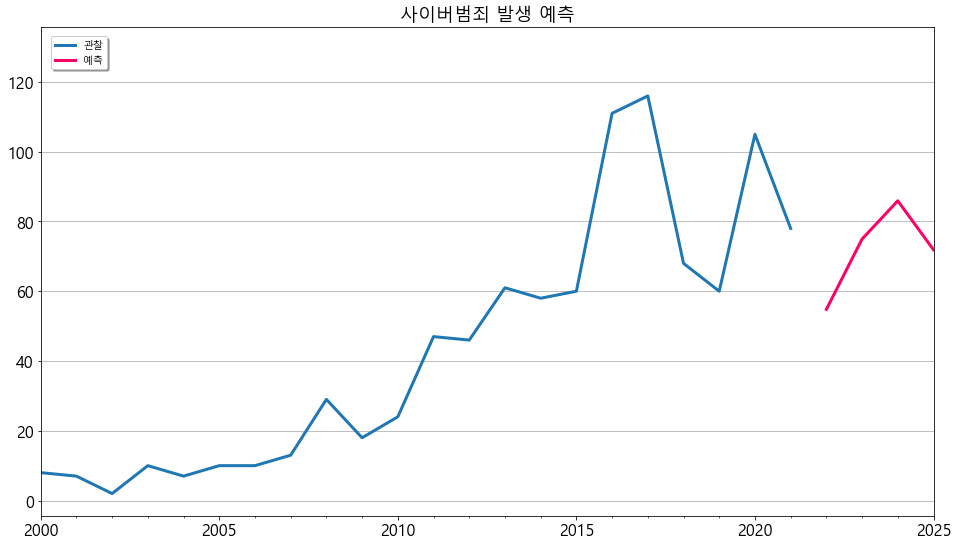

In [85]:
ax = data2['횟수']['2000-01-01':].plot( label = '관찰', figsize = (16, 9), linewidth = 3 )

pred_uc.predicted_mean.plot(
    ax = ax,
    label = '예측',
    linewidth = 3,
    color = '#ff0066'
)

ax.fill_between(
    pred_ci.index,
    pred_ci['lower 횟수'],
    pred_ci['upper 횟수'],
    color = 'white',
    alpha = .25
)

# ax.set_xlabel('연도',fontsize = 16)
# ax.set_ylabel('횟수', fontsize = 16)

ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

plt.title('사이버범죄 발생 예측', fontsize = 18)
plt.legend(shadow = True, bbox_to_anchor=(0.08, 0.99), framealpha=1)

plt.xlabel(None)
plt.ylabel(None)

plt.grid(True, axis='y')
plt.show()

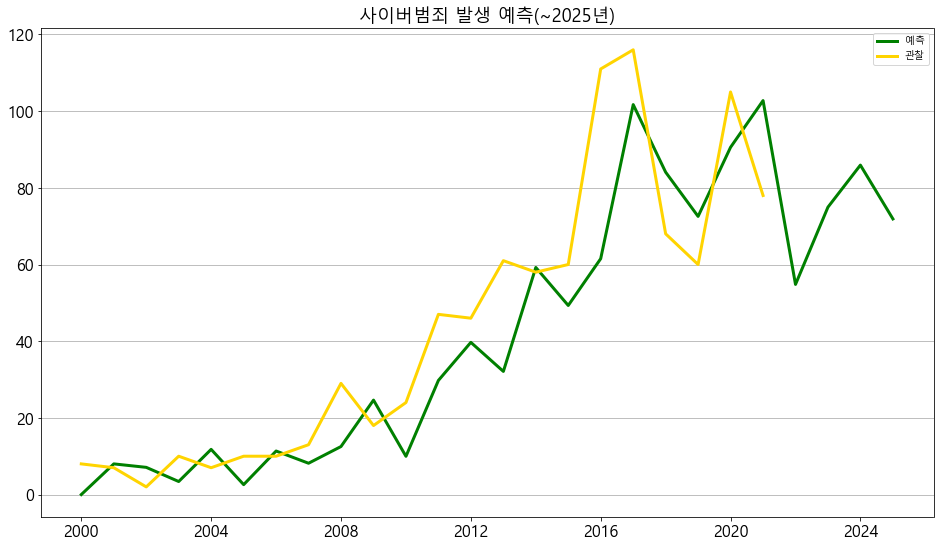

In [86]:
plt.figure(figsize=(16, 9))

sns.lineplot(data=data2, linewidth = 3, x = data2.index, y='예측', color = 'green')
sns.lineplot(data=data2, linewidth = 3, x = data2.index, y='횟수', color = '#FFD400')

plt.title('사이버범죄 발생 예측(~2025년)', fontsize = 18)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(None)

plt.legend(labels = ['예측', '관찰'])

plt.grid(True, axis='y')
plt.show()

# 모델 평가

In [87]:
# 모델 평가
from sklearn.metrics import r2_score

r2_score(data['횟수'], pred2['predicted_count'])

0.785624411950276